## 1. Load data from dbf file

In [76]:
from datetime import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(f'pandas version: {pd.__version__}')

pd.set_option('max_columns', 500)
# pd.set_option('max_rows', 10)

pandas version: 1.0.1


In [77]:
"""
Load content of a DBF file into a Pandas data frame.

The iter() is required because Pandas doesn't detect that the DBF
object is iterable.
"""

from dbfread import DBF

In [78]:
# !pip install pythainlp
from pythainlp.util import thai_strftime

In [118]:
from pptx import Presentation
import os

### 1.1 Download int file

In [3]:
setPath = input('Please enter path for int file (default as G:/relia/custbase/): ') or 'G:/relia/custbase/'
yearSelected = input('Please insert year (default as this year) : ') or str(dt.now().year)
print(f'Path : {setPath}')
print(f'Year : {yearSelected}')
fullPath = setPath + 'int_'+ yearSelected +'.dbf'
print(f'\nFull path : {fullPath}')

Please enter path for int file (default as G:/relia/custbase/): 
Please insert year (default as this year) : 
Path : G:/relia/custbase/
Year : 2020

Full path : G:/relia/custbase/int_2020.dbf


In [4]:
dbf = DBF(fullPath)
df_int = pd.DataFrame(iter(dbf))

In [5]:
total_records = df_int.shape[0]
df_int.tail()

,ID,DATE,NEW_MONTH,FROM,TO,ABB,FEEDER,LINE,CB,TIMEOCB,GROUP,EVENT,OUTGDIST,CUSTDIST,AREA,NIKOM,TYPE,NEW_CODE,RELAY,COMPONENT,ROAD,LATERAL,TIME_EQ,CUST_NUM,CUST_MIN,MAJOR,CONTROL,WEATHER,BK,BK_MIN,SP,SP_MIN,NB,NB_MIN
15248,1327.0,2020-10-31,10,17:47,17:47,PE,PE-411,,,0,F,O,6,6,C,N,CO,191,"OCI-YB,EFI,RR",C07,,HT.85-048292,0.0,7293.0,0.0,,U,R,1.0,0.0,0.0,0.0,7292.0,0.0
15249,1327.0,2020-10-31,10,17:47,17:47,PE,PE-411,,,0,F,O,6,3,C,N,CO,191,"OCI-YB,EFI,RR",C07,,HT.85-048292,0.0,1.0,0.0,,U,R,0.0,0.0,0.0,0.0,1.0,0.0
15250,1328.0,2020-10-31,10,19:56,19:56,CK,CK-413,,,0,F,I,14,14,C,N,TF,053,"OCI-RY,EFI-T,RR",C07,,SOI PHAHOLYOTHIN 21,0.0,1372.0,0.0,,C,R,1372.0,0.0,0.0,0.0,0.0,0.0
15251,1329.0,2020-10-31,10,20:32,20:32,KSK,KSK-413,,,0,F,I,15,15,S,N,TF,011,"OCI,EFI,RR",,,,0.0,3023.0,0.0,,C,N,1.0,0.0,0.0,0.0,3022.0,0.0
15252,1330.0,2020-10-31,10,23:51,23:51,RN,RN-438,,,0,F,I,7,7,C,N,TF,011,"TARGET NOT SHOWN,RR",,,,0.0,3119.0,0.0,,C,N,3119.0,0.0,0.0,0.0,0.0,0.0


### 1.2 Download distcust file

In [6]:
setPath = input('Please enter path for year file (default as G:/relia/custbase/common/): ') or 'G:/relia/custbase/common/'
# yearSelected = input('Please insert year (default as this year) : ') or str(dt.now().year)
print(f'Path : {setPath}')
# print(f'Year : {yearSelected}')
fullPath = setPath + 'distcust.dbf'
print(f'\nFull path : {fullPath}')

Please enter path for year file (default as G:/relia/custbase/common/): 
Path : G:/relia/custbase/common/

Full path : G:/relia/custbase/common/distcust.dbf


In [7]:
dbf = DBF(fullPath)
df_distcust = pd.DataFrame(iter(dbf))

In [8]:
df_distcust.tail()

,MONTH,YEAR,DISTRICT,NOCUS,D,REMARK,_NullFlags
3200,10,2020,15,235280,NaN,,b'\x00'
3201,10,2020,16,164325,NaN,,b'\x00'
3202,10,2020,17,188965,NaN,,b'\x00'
3203,10,2020,18,247330,NaN,,b'\x00'
3204,10,2020,99,4033298,NaN,,b'\x00'


### 1.3 Query target indices from MySQL

In [9]:
from sqlalchemy import create_engine # conda install sqlalchemy
import pymysql # conda install pymysql

In [10]:
print(f'pymysql version: {pymysql.__version__}')

pymysql version: 0.10.1


### - create a connection to MySQL

In [11]:
# uid = 'reliability'
# pwd = 'pcd_db'
# host = '10.99.1.36'
# uid = 'root'
# pwd = 'admin'
# host = 'localhost'
uid = 'root'
pwd = ''
host = 'localhost'
port = 3306
db = 'statistics_database'
con_string = f'mysql+pymysql://{uid}:{pwd}@{host}:{port}/{db}'
print(f'connection string = {con_string}')
con = create_engine(con_string)

connection string = mysql+pymysql://root:@localhost:3306/statistics_database


In [12]:
#  con.table_names()

['area_cust',
 'component',
 'discust',
 'district',
 'eachdisttarget',
 'eachdisttarget_focus_group',
 'egatpea_outage',
 'fdr_outage',
 'focusdist',
 'indices_db',
 'indices_db_15days',
 'int_nikom',
 'lineoutage',
 'masterlogin',
 'nw_cause',
 'outage_event_db',
 'outage_event_db_15days',
 'service_standard',
 'station_outage',
 'target',
 'target_mea_sepa',
 'target_mea_sepa_focus_group']

In [13]:
sql = 'select * from target'
target_mea = pd.read_sql(sql, con, index_col='target_id')

## 2. Change data type in each fields

In [9]:
# import Javascript for working with browser
# from IPython.display import Javascript
# Javascript("alert();")

In [14]:
df_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15253 entries, 0 to 15252
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         15252 non-null  float64
 1   DATE       15253 non-null  object 
 2   NEW_MONTH  15253 non-null  int64  
 3   FROM       15253 non-null  object 
 4   TO         15253 non-null  object 
 5   ABB        15253 non-null  object 
 6   FEEDER     15253 non-null  object 
 7   LINE       15253 non-null  object 
 8   CB         15253 non-null  object 
 9   TIMEOCB    15253 non-null  int64  
 10  GROUP      15253 non-null  object 
 11  EVENT      15253 non-null  object 
 12  OUTGDIST   15253 non-null  int64  
 13  CUSTDIST   15253 non-null  int64  
 14  AREA       15253 non-null  object 
 15  NIKOM      15253 non-null  object 
 16  TYPE       15253 non-null  object 
 17  NEW_CODE   15253 non-null  object 
 18  RELAY      15253 non-null  object 
 19  COMPONENT  15253 non-null  object 
 20  ROAD  

In [15]:
df_distcust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3205 entries, 0 to 3204
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MONTH       3205 non-null   int64  
 1   YEAR        3205 non-null   int64  
 2   DISTRICT    3205 non-null   int64  
 3   NOCUS       3205 non-null   int64  
 4   D           732 non-null    float64
 5   REMARK      3205 non-null   object 
 6   _NullFlags  3205 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 175.4+ KB


### 2.1 DATE field to datetime

In [16]:
regex = r'[12]\d{3}-0[1-9]|1[0-2]-0[1-9]|[12]\d|3[01]'
df_int[~(df_int['DATE'].astype(str).str.contains(regex))]['DATE'].unique()

array([], dtype=object)

In [17]:
df_int['DATE'] = pd.to_datetime(df_int['DATE'], errors='coerce')
# df.info()
print(f'Total records : {total_records}')
print('NaT records : %d' %df_int[df_int['DATE'].isna()]['ID'].count())
print('Date records : %d' %df_int[~df_int['DATE'].isna()]['ID'].count())
print('SUM records : %d' %(df_int[df_int['DATE'].isna()]['ID'].count() + df_int[~df_int['DATE'].isna()]['ID'].count()))

Total records : 15253
NaT records : 0
Date records : 15252
SUM records : 15252


In [18]:
target_mea['YearMonthnumberTarget'] = pd.to_datetime(target_mea['YearMonthnumberTarget'], errors='coerce')
target_mea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 1 to 48
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   YearMonthnumberTarget  48 non-null     datetime64[ns]
 1   MonthNameShort         48 non-null     object        
 2   SAIFI_DistTarget_1     48 non-null     float64       
 3   SAIFI_DistTarget_2     48 non-null     float64       
 4   SAIFI_DistTarget_3     48 non-null     float64       
 5   SAIFI_DistTarget_4     48 non-null     float64       
 6   SAIFI_DistTarget_5     48 non-null     float64       
 7   SAIDI_DistTarget_1     48 non-null     float64       
 8   SAIDI_DistTarget_2     48 non-null     float64       
 9   SAIDI_DistTarget_3     48 non-null     float64       
 10  SAIDI_DistTarget_4     48 non-null     float64       
 11  SAIDI_DistTarget_5     48 non-null     float64       
 12  SAIFI_LSTarget_1       48 non-null     float64       
 13  SAIFI_L

## 2. Calculate Indices

### 2.1 Strategy (S)

#### 2.1.1 MEA

In [19]:
con1 = df_int['TIMEOCB']>1
con2 = df_int['EVENT'].isin(['I', 'O'])
con3 = df_int['MAJOR']==''
con = con1 & con2 & con3
sustain_event = df_int[con]
mea = sustain_event.groupby([sustain_event['DATE'].dt.year.rename('year'), \
                sustain_event['DATE'].dt.month.rename('month'), \
                sustain_event['DATE'].dt.month_name().rename('month_name')])\
                [['CUST_NUM', 'CUST_MIN']].sum()\
                .rename(columns={'CUST_NUM':'sum_cust_num','CUST_MIN' : 'sum_cust_min'})\
                .reset_index()
mea['cum_sum_cust_num'] = mea['sum_cust_num'].cumsum()
mea['cum_sum_cust_min'] = mea['sum_cust_min'].cumsum()
mea

,year,month,month_name,sum_cust_num,sum_cust_min,cum_sum_cust_num,cum_sum_cust_min
0,2020,1,January,203911.0,7265399.11,203911.0,7265399.11
1,2020,2,February,346378.0,10772777.93,550289.0,18038177.04
2,2020,3,March,282033.0,9847239.09,832322.0,27885416.13
3,2020,4,April,432226.0,13436926.38,1264548.0,41322342.51
4,2020,5,May,322842.0,10308407.56,1587390.0,51630750.07
5,2020,6,June,265234.0,9199980.27,1852624.0,60830730.34
6,2020,7,July,342676.0,11392592.95,2195300.0,72223323.29
7,2020,8,August,263883.0,9331102.77,2459183.0,81554426.06
8,2020,9,September,276071.0,8973914.86,2735254.0,90528340.92
9,2020,10,October,258260.0,7577993.15,2993514.0,98106334.07


In [20]:
df_distcust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3205 entries, 0 to 3204
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MONTH       3205 non-null   int64  
 1   YEAR        3205 non-null   int64  
 2   DISTRICT    3205 non-null   int64  
 3   NOCUS       3205 non-null   int64  
 4   D           732 non-null    float64
 5   REMARK      3205 non-null   object 
 6   _NullFlags  3205 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 175.4+ KB


In [21]:
con1 = df_distcust['YEAR']==2020
con2 = df_distcust['DISTRICT']==99
con = con1 & con2
mea_cust = df_distcust[con].sort_values(by='MONTH', ascending=True)[['MONTH', 'NOCUS']].rename(columns={'MONTH': 'month', 'NOCUS': 'm_cust'})
mea_cust_cum = df_distcust[con].sort_values(by='MONTH', ascending=True)['NOCUS'].cumsum()
mea_cust['cum_cust'] = mea_cust_cum
mea_cust

,month,m_cust,cum_cust
3033,1,3921865,3921865
3052,2,3930090,7851955
3071,3,3937888,11789843
3090,4,3951565,15741408
3109,5,3966473,19707881
3128,6,3974205,23682086
3147,7,3990292,27672378
3166,8,4004184,31676562
3185,9,4017746,35694308
3204,10,4033298,39727606


In [61]:
mea_indices = mea.merge(mea_cust, how='inner', on='month')
mea_indices['SAIFI'] = round(mea_indices['cum_sum_cust_num']/mea_indices['cum_cust']*mea_indices['month'], 3)
mea_indices['SAIFIm'] = round(mea_indices['sum_cust_num']/mea_indices['m_cust'], 3)
mea_indices['SAIDI'] = round(mea_indices['cum_sum_cust_min']/mea_indices['cum_cust']*mea_indices['month'], 3)
mea_indices['SAIDIm'] = round(mea_indices['sum_cust_min']/mea_indices['m_cust'], 3)
mea_indices

,year,month,month_name,sum_cust_num,sum_cust_min,cum_sum_cust_num,cum_sum_cust_min,m_cust,cum_cust,SAIFI,SAIFIm,SAIDI,SAIDIm
0,2020,1,January,203911.0,7265399.11,203911.0,7265399.11,3921865,3921865,0.052,0.052,1.853,1.853
1,2020,2,February,346378.0,10772777.93,550289.0,18038177.04,3930090,7851955,0.140,0.088,4.595,2.741
2,2020,3,March,282033.0,9847239.09,832322.0,27885416.13,3937888,11789843,0.212,0.072,7.096,2.501
3,2020,4,April,432226.0,13436926.38,1264548.0,41322342.51,3951565,15741408,0.321,0.109,10.500,3.400
4,2020,5,May,322842.0,10308407.56,1587390.0,51630750.07,3966473,19707881,0.403,0.081,13.099,2.599
5,2020,6,June,265234.0,9199980.27,1852624.0,60830730.34,3974205,23682086,0.469,0.067,15.412,2.315
6,2020,7,July,342676.0,11392592.95,2195300.0,72223323.29,3990292,27672378,0.555,0.086,18.270,2.855
7,2020,8,August,263883.0,9331102.77,2459183.0,81554426.06,4004184,31676562,0.621,0.066,20.597,2.330
8,2020,9,September,276071.0,8973914.86,2735254.0,90528340.92,4017746,35694308,0.690,0.069,22.826,2.234
9,2020,10,October,258260.0,7577993.15,2993514.0,98106334.07,4033298,39727606,0.754,0.064,24.695,1.879


#### 2.1.2 MEA Target

In [93]:
target_mea_lastest_year = target_mea[target_mea['YearMonthnumberTarget'].dt.year==2020]\
                            [['YearMonthnumberTarget', 'SAIFI_MEATarget_1', 'SAIFI_MEATarget_2',
                              'SAIFI_MEATarget_3', 'SAIFI_MEATarget_4', 'SAIFI_MEATarget_5',
                               'SAIDI_MEATarget_1', 'SAIDI_MEATarget_2', 'SAIDI_MEATarget_3',
                               'SAIDI_MEATarget_4', 'SAIDI_MEATarget_5']]
target_mea_lastest_year

,YearMonthnumberTarget,SAIFI_MEATarget_1,SAIFI_MEATarget_2,SAIFI_MEATarget_3,SAIFI_MEATarget_4,SAIFI_MEATarget_5,SAIDI_MEATarget_1,SAIDI_MEATarget_2,SAIDI_MEATarget_3,SAIDI_MEATarget_4,SAIDI_MEATarget_5
target_id,,,,,,,,,,,
37,2020-01-01,0.087,0.082,0.077,0.072,0.067,1.186,1.118,1.050,0.982,0.914
38,2020-02-01,0.138,0.130,0.122,0.114,0.106,2.345,2.211,2.077,1.943,1.809
39,2020-03-01,0.257,0.242,0.227,0.212,0.197,4.331,4.084,3.837,3.590,3.343
40,2020-04-01,0.437,0.412,0.387,0.362,0.337,10.589,9.984,9.379,8.774,8.169
41,2020-05-01,0.561,0.528,0.495,0.462,0.430,14.060,13.257,12.454,11.651,10.848
42,2020-06-01,0.671,0.632,0.593,0.554,0.515,17.707,16.696,15.685,14.674,13.663
43,2020-07-01,0.806,0.759,0.712,0.665,0.618,21.733,20.492,19.251,18.010,16.769
44,2020-08-01,0.918,0.865,0.812,0.759,0.706,24.108,22.731,21.354,19.977,18.600
45,2020-09-01,1.075,1.013,0.951,0.889,0.827,28.953,27.299,25.645,23.991,22.337


In [94]:
target_mea_lastest_year['thai_abb_month'] = target_mea_lastest_year['YearMonthnumberTarget'].map(lambda x: thai_strftime(x, "%b"))
target_mea_lastest_year['thai_full_month'] = target_mea_lastest_year['YearMonthnumberTarget'].map(lambda x: thai_strftime(x, "%B"))

In [95]:
target_mea_lastest_year['year'] = target_mea_lastest_year['YearMonthnumberTarget'].dt.year
target_mea_lastest_year['be_year'] = target_mea_lastest_year['YearMonthnumberTarget'].dt.year + 543
target_mea_lastest_year['month'] = target_mea_lastest_year['YearMonthnumberTarget'].dt.month
target_mea_lastest_year['month_abb_name'] = target_mea_lastest_year['YearMonthnumberTarget'].dt.month_name().str.slice(stop=3)
target_mea_lastest_year['month_full_name'] = target_mea_lastest_year['YearMonthnumberTarget'].dt.month_name()
target_mea_lastest_year =target_mea_lastest_year[['year', 'be_year', 'month', 'month_abb_name', 'month_full_name', 
                                                  'thai_abb_month', 'thai_full_month', 'SAIFI_MEATarget_1', 
                                                  'SAIFI_MEATarget_2', 'SAIFI_MEATarget_3', 'SAIFI_MEATarget_4', 
                                                  'SAIFI_MEATarget_5', 'SAIDI_MEATarget_1', 'SAIDI_MEATarget_2', 
                                                  'SAIDI_MEATarget_3', 'SAIDI_MEATarget_4', 'SAIDI_MEATarget_5']]
target_mea_lastest_year

,year,be_year,month,month_abb_name,month_full_name,thai_abb_month,thai_full_month,SAIFI_MEATarget_1,SAIFI_MEATarget_2,SAIFI_MEATarget_3,SAIFI_MEATarget_4,SAIFI_MEATarget_5,SAIDI_MEATarget_1,SAIDI_MEATarget_2,SAIDI_MEATarget_3,SAIDI_MEATarget_4,SAIDI_MEATarget_5
target_id,,,,,,,,,,,,,,,,,
37,2020,2563,1,Jan,January,ม.ค.,มกราคม,0.087,0.082,0.077,0.072,0.067,1.186,1.118,1.050,0.982,0.914
38,2020,2563,2,Feb,February,ก.พ.,กุมภาพันธ์,0.138,0.130,0.122,0.114,0.106,2.345,2.211,2.077,1.943,1.809
39,2020,2563,3,Mar,March,มี.ค.,มีนาคม,0.257,0.242,0.227,0.212,0.197,4.331,4.084,3.837,3.590,3.343
40,2020,2563,4,Apr,April,เม.ย.,เมษายน,0.437,0.412,0.387,0.362,0.337,10.589,9.984,9.379,8.774,8.169
41,2020,2563,5,May,May,พ.ค.,พฤษภาคม,0.561,0.528,0.495,0.462,0.430,14.060,13.257,12.454,11.651,10.848
42,2020,2563,6,Jun,June,มิ.ย.,มิถุนายน,0.671,0.632,0.593,0.554,0.515,17.707,16.696,15.685,14.674,13.663
43,2020,2563,7,Jul,July,ก.ค.,กรกฎาคม,0.806,0.759,0.712,0.665,0.618,21.733,20.492,19.251,18.010,16.769
44,2020,2563,8,Aug,August,ส.ค.,สิงหาคม,0.918,0.865,0.812,0.759,0.706,24.108,22.731,21.354,19.977,18.600
45,2020,2563,9,Sep,September,ก.ย.,กันยายน,1.075,1.013,0.951,0.889,0.827,28.953,27.299,25.645,23.991,22.337


In [98]:
mea_indices.columns

Index(['year', 'month', 'month_name', 'SAIFI_MEATarget_1', 'SAIFI_MEATarget_2',
       'SAIFI_MEATarget_3', 'SAIFI_MEATarget_4', 'SAIFI_MEATarget_5',
       'SAIDI_MEATarget_1', 'SAIDI_MEATarget_2', 'SAIDI_MEATarget_3',
       'SAIDI_MEATarget_4', 'SAIDI_MEATarget_5', 'sum_cust_num',
       'sum_cust_min', 'cum_sum_cust_num', 'cum_sum_cust_min', 'm_cust',
       'cum_cust', 'SAIFI', 'SAIFIm', 'SAIDI', 'SAIDIm'],
      dtype='object')

In [99]:
mea_indices = target_mea_lastest_year.merge(mea_indices[['month', 'sum_cust_num', 'sum_cust_min',
                'cum_sum_cust_num', 'cum_sum_cust_min', 'm_cust', 'cum_cust', 'SAIFI',
                'SAIFIm', 'SAIDI', 'SAIDIm']], how='left', on='month')
mea_indices

,year,be_year,month,month_abb_name,month_full_name,thai_abb_month,thai_full_month,SAIFI_MEATarget_1,SAIFI_MEATarget_2,SAIFI_MEATarget_3,SAIFI_MEATarget_4,SAIFI_MEATarget_5,SAIDI_MEATarget_1,SAIDI_MEATarget_2,SAIDI_MEATarget_3,SAIDI_MEATarget_4,SAIDI_MEATarget_5,sum_cust_num,sum_cust_min,cum_sum_cust_num,cum_sum_cust_min,m_cust,cum_cust,SAIFI,SAIFIm,SAIDI,SAIDIm
0,2020,2563,1,Jan,January,ม.ค.,มกราคม,0.087,0.082,0.077,0.072,0.067,1.186,1.118,1.050,0.982,0.914,203911.0,7265399.11,203911.0,7265399.11,3921865.0,3921865.0,0.052,0.052,1.853,1.853
1,2020,2563,2,Feb,February,ก.พ.,กุมภาพันธ์,0.138,0.130,0.122,0.114,0.106,2.345,2.211,2.077,1.943,1.809,346378.0,10772777.93,550289.0,18038177.04,3930090.0,7851955.0,0.140,0.088,4.595,2.741
2,2020,2563,3,Mar,March,มี.ค.,มีนาคม,0.257,0.242,0.227,0.212,0.197,4.331,4.084,3.837,3.590,3.343,282033.0,9847239.09,832322.0,27885416.13,3937888.0,11789843.0,0.212,0.072,7.096,2.501
3,2020,2563,4,Apr,April,เม.ย.,เมษายน,0.437,0.412,0.387,0.362,0.337,10.589,9.984,9.379,8.774,8.169,432226.0,13436926.38,1264548.0,41322342.51,3951565.0,15741408.0,0.321,0.109,10.500,3.400
4,2020,2563,5,May,May,พ.ค.,พฤษภาคม,0.561,0.528,0.495,0.462,0.430,14.060,13.257,12.454,11.651,10.848,322842.0,10308407.56,1587390.0,51630750.07,3966473.0,19707881.0,0.403,0.081,13.099,2.599
5,2020,2563,6,Jun,June,มิ.ย.,มิถุนายน,0.671,0.632,0.593,0.554,0.515,17.707,16.696,15.685,14.674,13.663,265234.0,9199980.27,1852624.0,60830730.34,3974205.0,23682086.0,0.469,0.067,15.412,2.315
6,2020,2563,7,Jul,July,ก.ค.,กรกฎาคม,0.806,0.759,0.712,0.665,0.618,21.733,20.492,19.251,18.010,16.769,342676.0,11392592.95,2195300.0,72223323.29,3990292.0,27672378.0,0.555,0.086,18.270,2.855
7,2020,2563,8,Aug,August,ส.ค.,สิงหาคม,0.918,0.865,0.812,0.759,0.706,24.108,22.731,21.354,19.977,18.600,263883.0,9331102.77,2459183.0,81554426.06,4004184.0,31676562.0,0.621,0.066,20.597,2.330
8,2020,2563,9,Sep,September,ก.ย.,กันยายน,1.075,1.013,0.951,0.889,0.827,28.953,27.299,25.645,23.991,22.337,276071.0,8973914.86,2735254.0,90528340.92,4017746.0,35694308.0,0.690,0.069,22.826,2.234
9,2020,2563,10,Oct,October,ต.ค.,ตุลาคม,1.171,1.103,1.035,0.967,0.899,31.747,29.934,28.121,26.308,24.495,258260.0,7577993.15,2993514.0,98106334.07,4033298.0,39727606.0,0.754,0.064,24.695,1.879


## 3. Plot chart

In [179]:
import matplotlib 
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

# fig = plt.figure(figsize=(13.33,7.5), dpi=96)
# plt.plot(x, y, linewidth=2)
# plt.xlabel('X label (s)', fontsize=18)
# plt.ylabel('Y label (V)', fontsize=18)

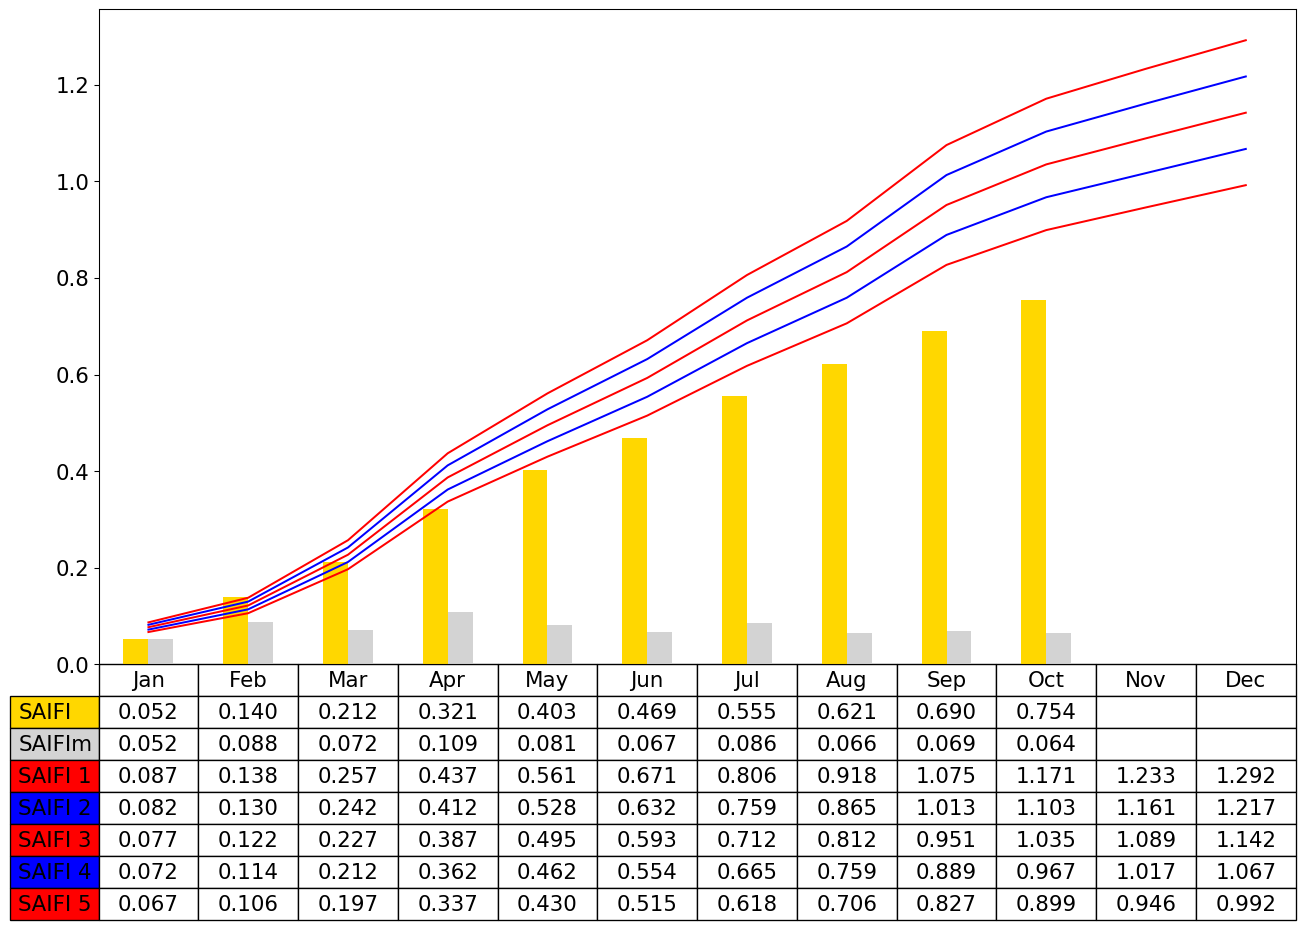

In [202]:
fig, ax = plt.subplots(1, 1, figsize=(13.33, 7.5), dpi=96)
# fig.set_size_inches(15, 7)
fig.tight_layout()
mea_indices\
    .rename(columns={'SAIFIm': 'SAIFI month'})\
    .plot(kind='bar', x='month_abb_name', y=['SAIFI', 'SAIFI month'], 
          color=['gold', 'lightgray'], table=False, ax=ax, legend=False, fontsize=16);
mea_indices\
    .plot(kind='line', x='month_abb_name', y=['SAIFI_MEATarget_1', 'SAIFI_MEATarget_2', 'SAIFI_MEATarget_3', 
                                              'SAIFI_MEATarget_4', 'SAIFI_MEATarget_5'], 
                                              color=['red', 'blue'], ax=ax, legend=False, fontsize=16);
# table = mea_plot.tables[0]
# table.set_fontsize(18)
# table.scale(1, 2)
ax.set_xticks([])
ax.set_xlabel(None)

# print(mea_indices)
# mea_indices[['month_abb_name','SAIFI', 'SAIFIm', 'SAIFI_MEATarget_1', 'SAIFI_MEATarget_5']].set_index('month_abb_name')
dt_table = mea_indices[['month_abb_name','SAIFI', 'SAIFIm', 'SAIFI_MEATarget_1', 'SAIFI_MEATarget_2', 
                        'SAIFI_MEATarget_3', 'SAIFI_MEATarget_4', 'SAIFI_MEATarget_5']].set_index('month_abb_name')
dt_table.update(dt_table[['SAIFI', 'SAIFIm', 'SAIFI_MEATarget_1', 'SAIFI_MEATarget_2', 
                          'SAIFI_MEATarget_3', 'SAIFI_MEATarget_4', 'SAIFI_MEATarget_5']].applymap('{:,.3f}'.format))
dt_table.replace(['nan'], '', inplace=True)
dt_table = dt_table.T
dt_table.rename({'SAIFI_MEATarget_1': 'SAIFI 1', 
                 'SAIFI_MEATarget_2': 'SAIFI 2', 
                 'SAIFI_MEATarget_3': 'SAIFI 3', 
                 'SAIFI_MEATarget_4': 'SAIFI 4', 
                 'SAIFI_MEATarget_5': 'SAIFI 5', }, 
                 inplace=True)

cell_text = dt_table.values
table = ax.table(cellText=cell_text, 
                      rowLabels=dt_table.index, 
                      rowColours=['gold', 'lightgray', 'red', 'blue', 'red', 'blue', 'red'], 
                      colLabels=dt_table.columns, 
                      cellLoc='center', 
                      loc='bottom')
table.auto_set_font_size(False)
table.set_fontsize(16)
table.scale(1, 2)

fig.savefig('chart_test.png', bbox_inches='tight', transparent=True)

[['431.5', '1049.4', '799.6', '2149.8', '917.9'], ['292.2', '717.8', '456.4', '1368.5', '865.6'], ['213.8', '636.0', '305.7', '1175.2', '796.0'], ['124.6', '555.4', '153.2', '677.2', '192.5'], ['66.4', '174.3', '75.1', '577.9', '32.0']]


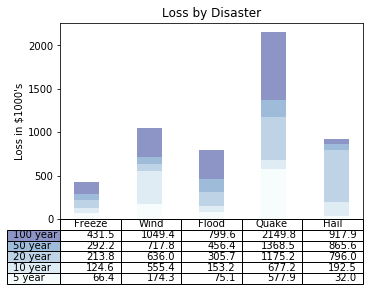

In [50]:
import numpy as np
import matplotlib.pyplot as plt


data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()
print(cell_text)

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

In [32]:
["{:X}".format(i) for i in range(10)] 

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [33]:
["{:02X}".format(10 * i) for i in range(10)] 

['00', '0A', '14', '1E', '28', '32', '3C', '46', '50', '5A']

In [34]:
[["" for c in range(10)] for r in range(10)]

[['', '', '', '', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '', '', '', ''],
 ['', '', '', '', '', '', '', '', '', '']]

In [35]:
import numpy as np
randn = np.random.randn
from pandas import *

idx = Index(np.arange(1,11))
df = DataFrame(randn(10, 5), index=idx, columns=['A', 'B', 'C', 'D', 'E'])
vals = np.around(df.values,3)

df
# print(df)
# print(vals)

,A,B,C,D,E
1,-0.779733,0.408071,1.721529,0.798563,1.086645
2,0.385401,0.934464,1.036293,-0.435628,1.013610
3,0.424456,0.208299,1.033553,1.385712,1.794085
4,-1.730936,0.659595,0.658384,0.394031,-0.871227
5,1.014258,-0.144991,1.096254,0.453944,1.058438
6,1.346726,1.727675,2.252996,-2.122508,0.979354
7,1.084616,-0.884104,-0.051643,0.390367,0.132060
8,0.235034,-0.797455,0.640750,1.266309,-0.572425
9,-0.302609,-0.777245,-0.667266,-0.006670,-0.636961
10,0.860997,-0.140214,0.160641,-1.419413,-0.276618


     0    1    2    3    4    5    6    7    8    9
0  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2  NaN  NaN  4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3  NaN  NaN  NaN  4.0  NaN  NaN  NaN  NaN  NaN  NaN
4  NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN  NaN  NaN
5  NaN  NaN  NaN  NaN  NaN  2.0  NaN  NaN  NaN  NaN
6  NaN  NaN  NaN  NaN  NaN  NaN  3.0  NaN  NaN  NaN
7  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN
8  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  3.0  NaN
9  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  3.0
['b', 'r', 'g', 'y', 'k', 'b', 'r', 'g', 'y', 'k']


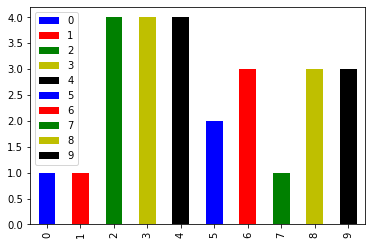

In [36]:
from matplotlib import pyplot as plt
from itertools import cycle, islice
import pandas, numpy as np  # I find np.random.randint to be better

# Make the data
x = [{i:np.random.randint(1,5)} for i in range(10)]
df = pandas.DataFrame(x)
print(df)

# Make a list by cycling through the colors you care about
# to match the length of your data.
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
print(my_colors)

# Specify this list of colors as the `color` option to `plot`.
df.plot(kind='bar', stacked=True, color=my_colors)

## python - pptx

In [37]:
# !pip install python-pptx

In [121]:
from pptx import Presentation
import os

prs = Presentation()
title_slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(title_slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]

title.text = "Hello, World!"
subtitle.text = "python-pptx was here!"

prs.save('test.pptx')
os.startfile('test.pptx')

In [198]:
from pptx import Presentation
from pptx.util import Inches

img_path = 'chart_test.png'

prs = Presentation()
prs.slide_width = 12192000
prs.slide_height = 6858000

blank_slide_layout = prs.slide_layouts[6]
slide = prs.slides.add_slide(blank_slide_layout)

left = top = Inches(0)
width = Inches(13.3)
height = Inches(7.5)
pic = slide.shapes.add_picture(img_path, left, top, width, height)

# left = Inches(5)
# height = Inches(5.5)
# pic = slide.shapes.add_picture(img_path, left, top, height=height)

prs.save('test.pptx')
os.startfile('test.pptx')

In [35]:
from pptx import Presentation
from pptx.util import Inches

prs = Presentation()
title_only_slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(title_only_slide_layout)
shapes = slide.shapes

shapes.title.text = 'Adding a Table'

rows = cols = 2
left = top = Inches(2.0)
width = Inches(6.0)
height = Inches(0.8)

table = shapes.add_table(rows, cols, left, top, width, height).table

# set column widths
table.columns[0].width = Inches(2.0)
table.columns[1].width = Inches(4.0)

# write column headings
table.cell(0, 0).text = 'Foo'
table.cell(0, 1).text = 'Bar'

# write body cells
table.cell(1, 0).text = 'Baz'
table.cell(1, 1).text = 'Qux'

prs.save('test.pptx')
os.startfile('test.pptx')